<a href="https://colab.research.google.com/github/bom712/DataScience/blob/master/Hands_on_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connecting to git

In [ ]:
!apt install from git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package from


In [ ]:
!git clone https://github.com/bom712/Fine_tuning_from_scratch.git

Cloning into 'Fine_tuning_from_scratch'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
%cd Fine_tuning_from_scratch

/content/Fine_tuning_from_scratch


In [ ]:
with open("main.py","w") as f:
  f.write("print('this is LLM hands on through colab')")

In [ ]:
!git config --global user.email souravchandra2k4.bit@gmail.com
!git config --global user.name bom712

In [ ]:
!git add .
!git commit -m "this is LLM hands on through colab"

[main 52d3789] this is LLM hands on through colab
 1 file changed, 1 insertion(+)
 create mode 100644 main.py


## Creating a placeholder model

In [ ]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.tok_embb=nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
    self.pos_embb=nn.Embedding(cfg["context_length"],cfg["emb_dim"])
    self.drop_emb=nn.Dropout(cfg["drop_rate"])
    self.trf_blocks=nn.Sequential(*[TransformerBlock(cfg) for _ in range(cfg["num_layers"])])
    self.final_norm=DummyLayerNorm(cfg["emb_dim"])
    self.out_head=nn.Linear(cfg["emb_dim"],cfg["vocab_size"],bias=False)

  def forward(self,in_idx):
    batch_size,seq_len=in_idx.shape
    tok_embeds=self.tok_embb(in_idx)
    pos_embeds=self.pos_embb(torch.arange(seq_len),device=in_idx.device)
    x=tok_embeds+pos_embeds
    x=self.drop_emb(x)
    x=self.trf_blocks(x)
    x=self.final_norm(x)
    logits=self.out_head(x)
    return logits

class DummyTransformerBlock(nn.Module):
  def __init__(self,cfg):
    super().__init__()

  def forward(self,x):
    return x
class DummyLayerNorm(nn.Module):
  def __init__(self,normalized_shape,eps=1e-5):
    super().__init__()

  def forward(self,x):
    return x


In [ ]:
import tiktoken
tokenizer=tiktoken.get_encoding("gpt2")
batch=[]
tx1="Every effort moves you"
txt2="Every day holds a"
batch.append(torch.tensor(tokenizer.encode(tx1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch =torch.stack(batch,dim=0)
print(batch)


tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [ ]:
torch.manual_seed(123)

# Define config
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "emb_dim": 768,
    "context_length": 1024,
    "drop_rate": 0.1,
    "num_layers": 12
}

# Create model
model = DummyGPTModel(GPT_CONFIG_124M)

# Run forward pass
logits = model(batch)
print(logits.shape)
print(logits)


KeyError: 'num_layers'

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(123)
batch_example=torch.randn(2,5)
layer=nn.Sequential(nn.Linear(5,6),nn.ReLU())
output=layer(batch_example)
print(output)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [ ]:
mean=output.mean(dim=-1,keepdim=True)
variance=output.var(dim=-1,keepdim=True)
print(mean)
print(variance)

tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [ ]:
out_norm=(output-mean)/torch.sqrt(variance)
norm_mean=out_norm.mean(dim=-1,keepdim=True)
norm_var=out_norm.var(dim=-1,keepdim=True)
print(norm_mean)
print("this is norm mean",norm_mean)
print("this is norm variance",norm_var)

tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
this is norm mean tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
this is norm variance tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


## building the normalization block

In [ ]:
class LayerNorm(nn.Module):

  def __init__(self,normalized_shape,eps=1e-5):
    super().__init__()
    self.scale=nn.parameter(torch.ones(normalized_shape))
    self.shift=nn.parameter(torch.zeros(normalized_shape))
    self.eps=1e-5

  def forward(self,x):
    mean=x.mean(dim=-1,keepdim=True)
    variance=x.var(dim=-1,keepdim=True)
    norm_x=(x-mean)/torch.sqrt(variance+self.eps)
    return norm_x*self.scale+self.shift

In [ ]:
class GELU(nn.Module):
  def __init(self):
    super().__init__()

    def forward(self, x):
      return 0.5 * x * (1 + torch.tanh(
      torch.sqrt(torch.tensor(2.0 / torch.pi)) *
      (x + 0.044715 * torch.pow(x, 3))
      ))


NameError: name 'nn' is not defined

##

In [ ]:
class FeedForward(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.layers=nn.Sequential(nn.Linear(cfg["emb_dim"],4*cfg["emb_dim"]),
                              GELU(),
                              nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"]))
  def forward(self,x):
    return self.layers(x)

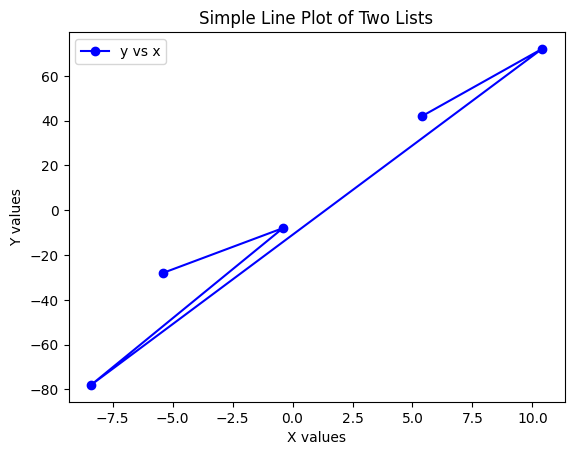

In [1]:
import matplotlib.pyplot as plt

# Example lists
x = [-5.4, -.4, -8.4, 10.4, 5.4]
y = [-28, -8,-78, 72, 42]



# Create the plot
plt.plot(x, y, marker='o', linestyle='-', color='b', label='y vs x')

# Add labels and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple Line Plot of Two Lists")

# Show legend
plt.legend()

# Display the plot
plt.show()


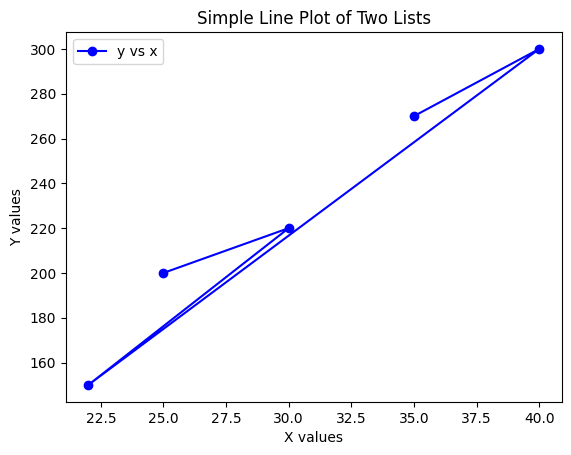

In [2]:
import matplotlib.pyplot as plt

# Example lists
x = [25, 30, 22, 40, 35]
y = [200, 220,150, 300, 270]



# Create the plot
plt.plot(x, y, marker='o', linestyle='-', color='b', label='y vs x')

# Add labels and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple Line Plot of Two Lists")

# Show legend
plt.legend()

# Display the plot
plt.show()
